# Plain Trotterisation benchmark

In [35]:
evolution_time = 0.2
n_repetitions = 5
degree = 2

In [36]:
# Ising-1d
from ropt_aqc.initialise_hamiltonians import get_hamiltonian_terms, hamiltonian_to_sparse_pauli_op, build_matrix_from_terms
from qiskit import QuantumCircuit
from scipy.linalg import expm
from qiskit.quantum_info import Statevector

method = 'Trott'
num_sites = 6
n_id_layers = 0

J=1.
g=0.75
h=0.6
system = 'ising-1d'

terms, params = get_hamiltonian_terms(num_qubits=num_sites, system=system, J=J, g=g, h=h)
J = params['J']
h = params['h']
g = params['g']

H_sparse = hamiltonian_to_sparse_pauli_op(terms, num_qubits=num_sites)
print(H_sparse)


# Generate an initial state
initial_state = QuantumCircuit(num_sites)
for i in range(num_sites):
    if i % 2:
        initial_state.x(i)


H = build_matrix_from_terms(terms, num_sites)

# Exact evolution operator
U_exact = expm(-1j * evolution_time * H)

# Initial statevector
initial_sv = Statevector(initial_state)

# Apply exact evolution
reference_state = initial_sv.evolve(U_exact)

SparsePauliOp(['ZZIIII', 'IZZIII', 'IIZZII', 'IIIZZI', 'IIIIZZ', 'ZIIIII', 'XIIIII', 'IZIIII', 'IXIIII', 'IIZIII', 'IIXIII', 'IIIZII', 'IIIXII', 'IIIIZI', 'IIIIXI', 'IIIIIZ', 'IIIIIX'],
              coeffs=[1.  +0.j, 1.  +0.j, 1.  +0.j, 1.  +0.j, 1.  +0.j, 0.6 +0.j, 0.75+0.j,
 0.6 +0.j, 0.75+0.j, 0.6 +0.j, 0.75+0.j, 0.6 +0.j, 0.75+0.j, 0.6 +0.j,
 0.75+0.j, 0.6 +0.j, 0.75+0.j])


In [37]:
# from ropt_aqc.trotterisation import trotterisation

# for n_repetitions in [5, 8, 10, 12, 15, 18]:
#     final_circuit, fidelity = trotterisation(degree, H_sparse, evolution_time, n_repetitions, initial_state, num_sites, terms)
#     print('t:', evolution_time, 'n_reps:', n_repetitions)
#     print('Fidelity: ', fidelity)
#     print('depth:', final_circuit.depth())

In [38]:
from ropt_aqc.trotterisation import trotterisation

final_circuit, fidelity = trotterisation(degree, H_sparse, evolution_time, n_repetitions, initial_state, num_sites, terms)
print('t:', evolution_time, 'n_reps:', n_repetitions)
print('Fidelity: ', fidelity)
print('depth:', final_circuit.depth())

t: 0.2 n_reps: 5
Fidelity:  0.9998035011183343
depth: 101


In [39]:
final_circuit.draw("mpl")
depth = final_circuit.depth()
print(depth)

101


In [40]:
from ropt_aqc.circuit_building import truncate_qiskit_circuit
from qiskit.quantum_info import state_fidelity
import pandas as pd
from qiskit.quantum_info import Statevector, state_fidelity 


data = []
N_vals = range(1,depth)

for N in N_vals:
    truncated_circuit = truncate_qiskit_circuit(final_circuit, N)
    truncated_circuit.draw("mpl")
        
    truncated_state = Statevector(truncated_circuit)


    fidelity = state_fidelity(truncated_state, reference_state)
    print(f"Fidelity: {fidelity}")

    data.append({
                "Trotter_steps": n_repetitions,
                "circuit_layers": N,
                "Final_fidelity": fidelity
            })
       
    df = pd.DataFrame(data)


Fidelity: 0.8785704496180996
Fidelity: 0.8785704496180998
Fidelity: 0.8785704496180996
Fidelity: 0.8785704496180996
Fidelity: 0.8785704496180996
Fidelity: 0.8785704496180994
Fidelity: 0.8785704496180994
Fidelity: 0.8852116219734691
Fidelity: 0.8852116219734694
Fidelity: 0.8920258985371908
Fidelity: 0.8920258985371908
Fidelity: 0.8979108647950557
Fidelity: 0.8979108647950557
Fidelity: 0.9048228241257322
Fidelity: 0.904822824125732
Fidelity: 0.9107940022603136
Fidelity: 0.9107940022603134
Fidelity: 0.9182111380999697
Fidelity: 0.9183916308700713
Fidelity: 0.9186273466279762
Fidelity: 0.9187991046220232
Fidelity: 0.918954767144734
Fidelity: 0.9191669264957604
Fidelity: 0.9193145893060899
Fidelity: 0.919667661538589
Fidelity: 0.9200208572984163
Fidelity: 0.920105748822554
Fidelity: 0.9253924385303747
Fidelity: 0.9253348593567776
Fidelity: 0.9307820402892073
Fidelity: 0.9309101042771788
Fidelity: 0.9354042006999463
Fidelity: 0.9353459714526308
Fidelity: 0.9408535577074899
Fidelity: 0.940983

In [41]:
file_path_ising = '/Users/aag/Documents/ropt-aqc/method_comparison/results/Trotterisation2_Ising_results_0.2.csv'

# df.to_csv(file_path_ising, index=False, header=True)
# df.to_csv(file_path_trotterisation, index=False, mode="a", header=False)

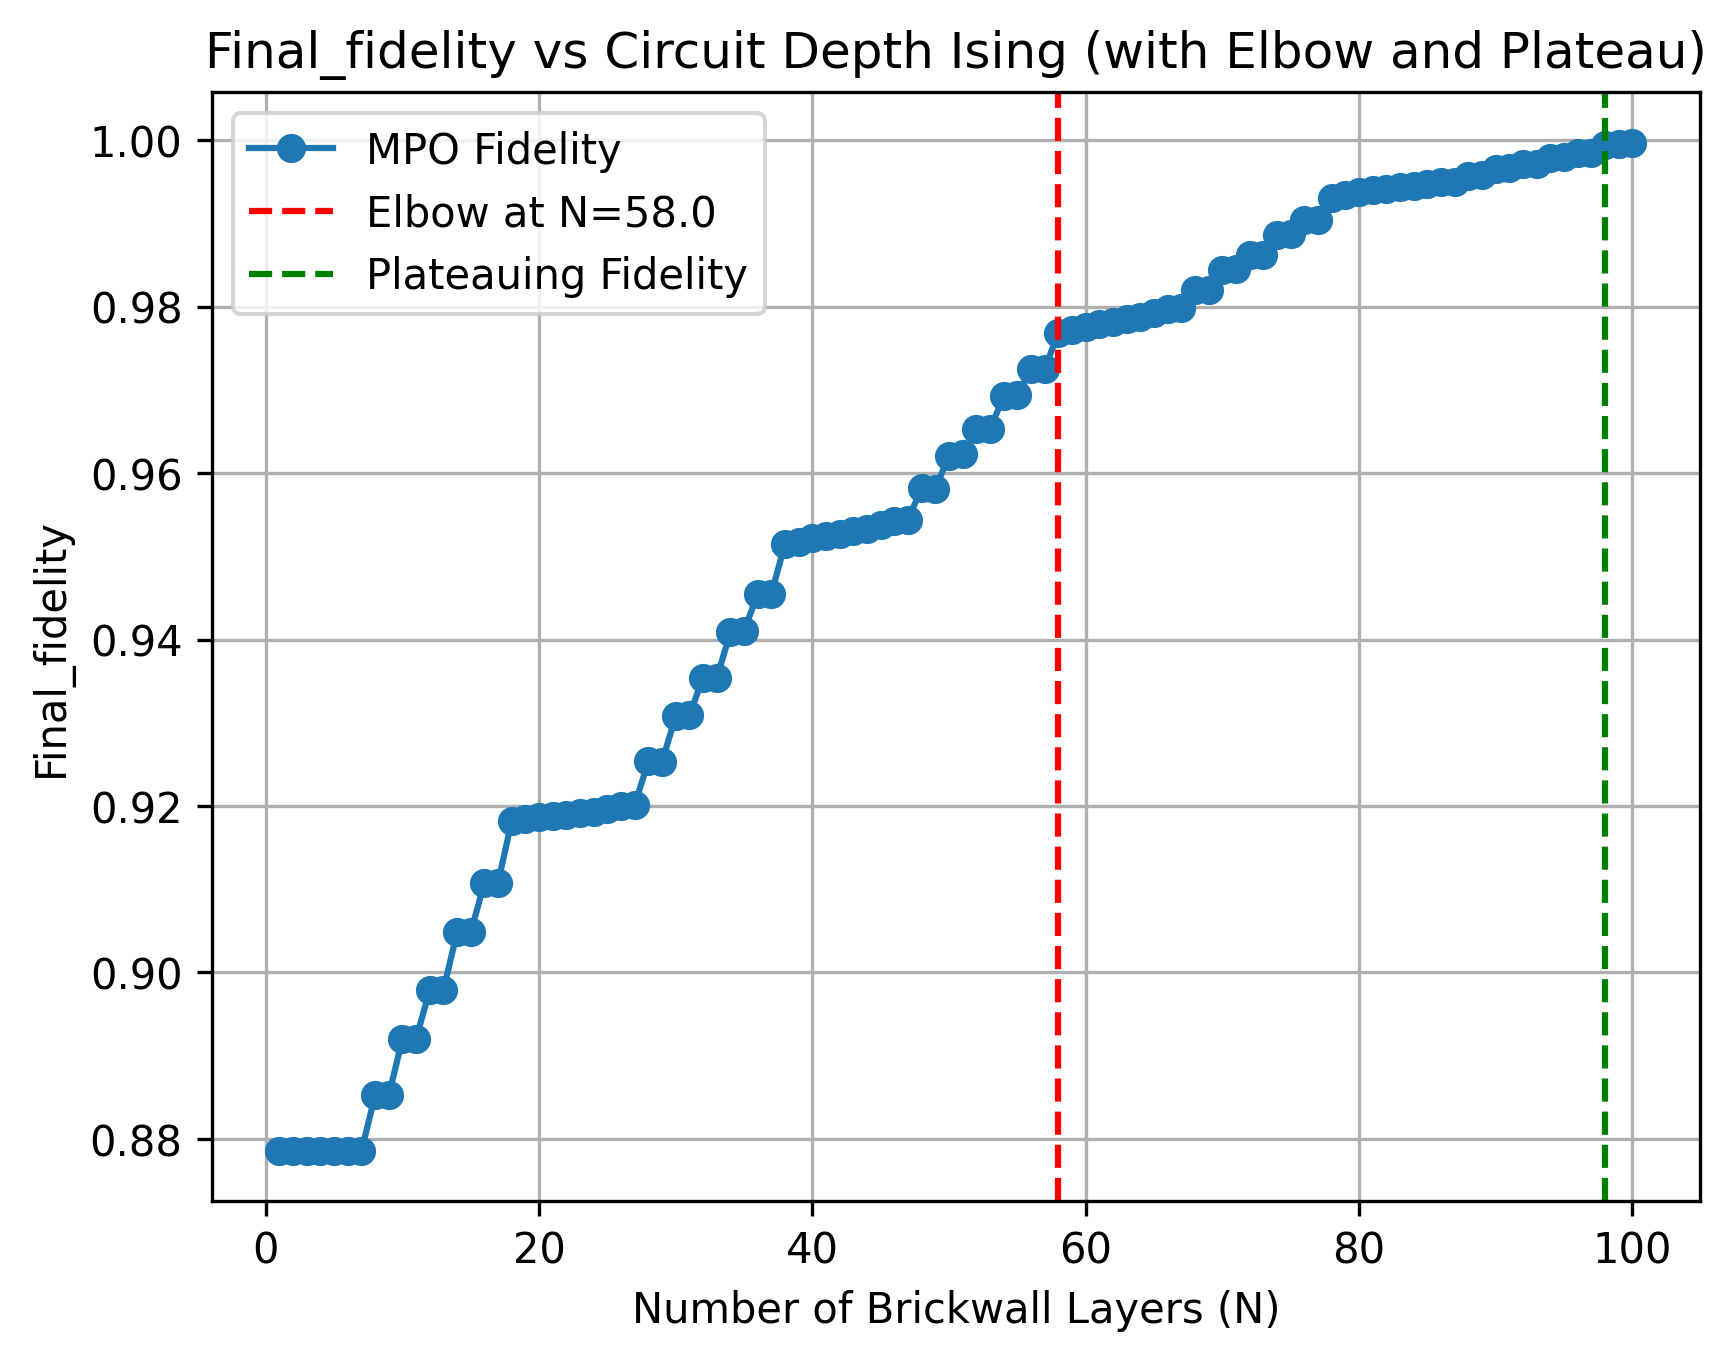


🔍 Suggested optimal compression depth: N = 98.0


In [42]:
from ropt_aqc.brickwall_opt import plot_fidelity
import matplotlib.pyplot as plt
import os

elbow_N, plateau_N = plot_fidelity(df, 'Final_fidelity', evolution_time, 1e-3, method, system, save_path=True)

# Heisenberg

In [31]:
evolution_time = 0.2
n_repetitions = 10
degree = 2

In [32]:
from ropt_aqc.initialise_hamiltonians import get_hamiltonian_terms, hamiltonian_to_sparse_pauli_op, build_matrix_from_terms
from qiskit import QuantumCircuit
from scipy.linalg import expm
from qiskit.quantum_info import Statevector

method = 'Trott'
num_sites = 6
n_id_layers = 0

h = 0.75
system = 'heisenberg'

terms_h, params_h = get_hamiltonian_terms(num_qubits=num_sites, system=system, J=[1.0, 1.0, -0.5], h=[0.75, 0.0, 0.0])
J = params_h['J']
h = params_h['h']

H_sparse_h = hamiltonian_to_sparse_pauli_op(terms_h, num_qubits=num_sites)
print(H_sparse_h)


# Generate an initial state
initial_state = QuantumCircuit(num_sites)
for i in range(num_sites):
    if i % 2:
        initial_state.x(i)


H_h = build_matrix_from_terms(terms_h, num_sites)

# Exact evolution operator
U_exact_h = expm(-1j * evolution_time * H_h)

# Initial statevector
initial_sv = Statevector(initial_state)

# Apply exact evolution
reference_state_h = initial_sv.evolve(U_exact_h)

SparsePauliOp(['XXIIII', 'YYIIII', 'ZZIIII', 'IXXIII', 'IYYIII', 'IZZIII', 'IIXXII', 'IIYYII', 'IIZZII', 'IIIXXI', 'IIIYYI', 'IIIZZI', 'IIIIXX', 'IIIIYY', 'IIIIZZ', 'XIIIII', 'IXIIII', 'IIXIII', 'IIIXII', 'IIIIXI', 'IIIIIX'],
              coeffs=[ 1.  +0.j,  1.  +0.j, -0.5 +0.j,  1.  +0.j,  1.  +0.j, -0.5 +0.j,
  1.  +0.j,  1.  +0.j, -0.5 +0.j,  1.  +0.j,  1.  +0.j, -0.5 +0.j,
  1.  +0.j,  1.  +0.j, -0.5 +0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j,
  0.75+0.j,  0.75+0.j,  0.75+0.j])


In [3]:
from ropt_aqc.trotterisation import trotterisation
for evolution_time in [0.2, 0.5, 1.0, 1.5, 2.0]:
    for n_repetitions in [5, 8, 10, 12, 15, 18]:
        final_circuit_h, fidelity_h = trotterisation(degree, H_sparse_h, evolution_time, n_repetitions, initial_state, num_sites, terms_h)
        print('t:', evolution_time, 'n_reps:', n_repetitions)
        print('Fidelity: ', fidelity_h)
        print('depth:', final_circuit_h.depth())

/Users/aag/Documents/ropt-aqc/ropt_aqc/initialise_hamiltonians.py:143: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in zeros is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  H = jnp.zeros((2**num_qubits, 2**num_qubits), dtype=jnp.complex128)


t: 0.2 n_reps: 5
Fidelity:  0.998775692182127
depth: 45
t: 0.2 n_reps: 8
Fidelity:  0.9995197294857903
depth: 66
t: 0.2 n_reps: 10
Fidelity:  0.9996921397381706
depth: 80
t: 0.2 n_reps: 12
Fidelity:  0.9997859797355595
depth: 94
t: 0.2 n_reps: 15
Fidelity:  0.9998628868752141
depth: 115
t: 0.2 n_reps: 18
Fidelity:  0.9999047260395793
depth: 136
t: 0.5 n_reps: 5
Fidelity:  0.9738404904338537
depth: 45
t: 0.5 n_reps: 8
Fidelity:  0.989547334314519
depth: 66
t: 0.5 n_reps: 10
Fidelity:  0.9932581204292098
depth: 80
t: 0.5 n_reps: 12
Fidelity:  0.9952936776941697
depth: 94
t: 0.5 n_reps: 15
Fidelity:  0.9969721783882983
depth: 115
t: 0.5 n_reps: 18
Fidelity:  0.9978900096541732
depth: 136
t: 1.0 n_reps: 5
Fidelity:  0.7550964423932344
depth: 45
t: 1.0 n_reps: 8
Fidelity:  0.8965139881357038
depth: 66
t: 1.0 n_reps: 10
Fidelity:  0.9325722837482933
depth: 80
t: 1.0 n_reps: 12
Fidelity:  0.9527299028695361
depth: 94
t: 1.0 n_reps: 15
Fidelity:  0.9695216193935678
depth: 115
t: 1.0 n_reps: 18

In [33]:
from ropt_aqc.trotterisation import trotterisation

final_circuit_h, fidelity_h = trotterisation(degree, H_sparse_h, evolution_time, n_repetitions, initial_state, num_sites, terms_h)
print('t:', evolution_time, 'n_reps:', n_repetitions)
print('Fidelity: ', fidelity_h)
print('depth:', final_circuit_h.depth())

t: 0.2 n_reps: 10
Fidelity:  0.9999327361624507
depth: 301


In [27]:
final_circuit_h.draw("mpl")
depth = final_circuit_h.depth()
print(depth)

151


In [34]:
from ropt_aqc.circuit_building import truncate_qiskit_circuit
from qiskit.quantum_info import state_fidelity
import pandas as pd

data_h = []
N_vals = range(1,50)

for N in N_vals:
    truncated_circuit_h = truncate_qiskit_circuit(final_circuit_h, N)
    truncated_circuit_h.draw("mpl")
        
    truncated_state_h = Statevector(truncated_circuit_h)


    fidelity_h = state_fidelity(truncated_state_h, reference_state_h)
    print(f"Fidelity: {fidelity_h}")

    data_h.append({
                "Trotter_steps": n_repetitions,
                "circuit_layers": N,
                "Final_fidelity": fidelity_h
            })
       
    df_h = pd.DataFrame(data_h)


Fidelity: 0.3696234704748625
Fidelity: 0.3729141995017269
Fidelity: 0.37614466471928776
Fidelity: 0.37614466471928776
Fidelity: 0.3795911723540472
Fidelity: 0.382977740534332
Fidelity: 0.382977740534332
Fidelity: 0.3863868366339265
Fidelity: 0.3897334831220001
Fidelity: 0.38973348312199996
Fidelity: 0.3967066100131683
Fidelity: 0.40339901847324106
Fidelity: 0.4034315454071664
Fidelity: 0.41065011773665
Fidelity: 0.4175781559498594
Fidelity: 0.4176080587525948
Fidelity: 0.41947637687267825
Fidelity: 0.4215279610822112
Fidelity: 0.42353306056084555
Fidelity: 0.42554840082651474
Fidelity: 0.42761739919834113
Fidelity: 0.4295171714188231
Fidelity: 0.43307273598049556
Fidelity: 0.43653383130476575
Fidelity: 0.43655556517800287
Fidelity: 0.4402359492752961
Fidelity: 0.44380139912684596
Fidelity: 0.44384591649504684
Fidelity: 0.4475196502457554
Fidelity: 0.4510959912063615
Fidelity: 0.4511165118861081
Fidelity: 0.4546438618453514
Fidelity: 0.45806999876473076
Fidelity: 0.458088595049635
Fidel

In [35]:
file_path_heisenberg = '/Users/aag/Documents/ropt-aqc/method_comparison/results/Trotterisation2_Heisenberg_results_0.2.csv'

df_h.to_csv(file_path_heisenberg, index=False, header=True)
# df.to_csv(file_path_heisenberg, index=False, mode="a", header=False)

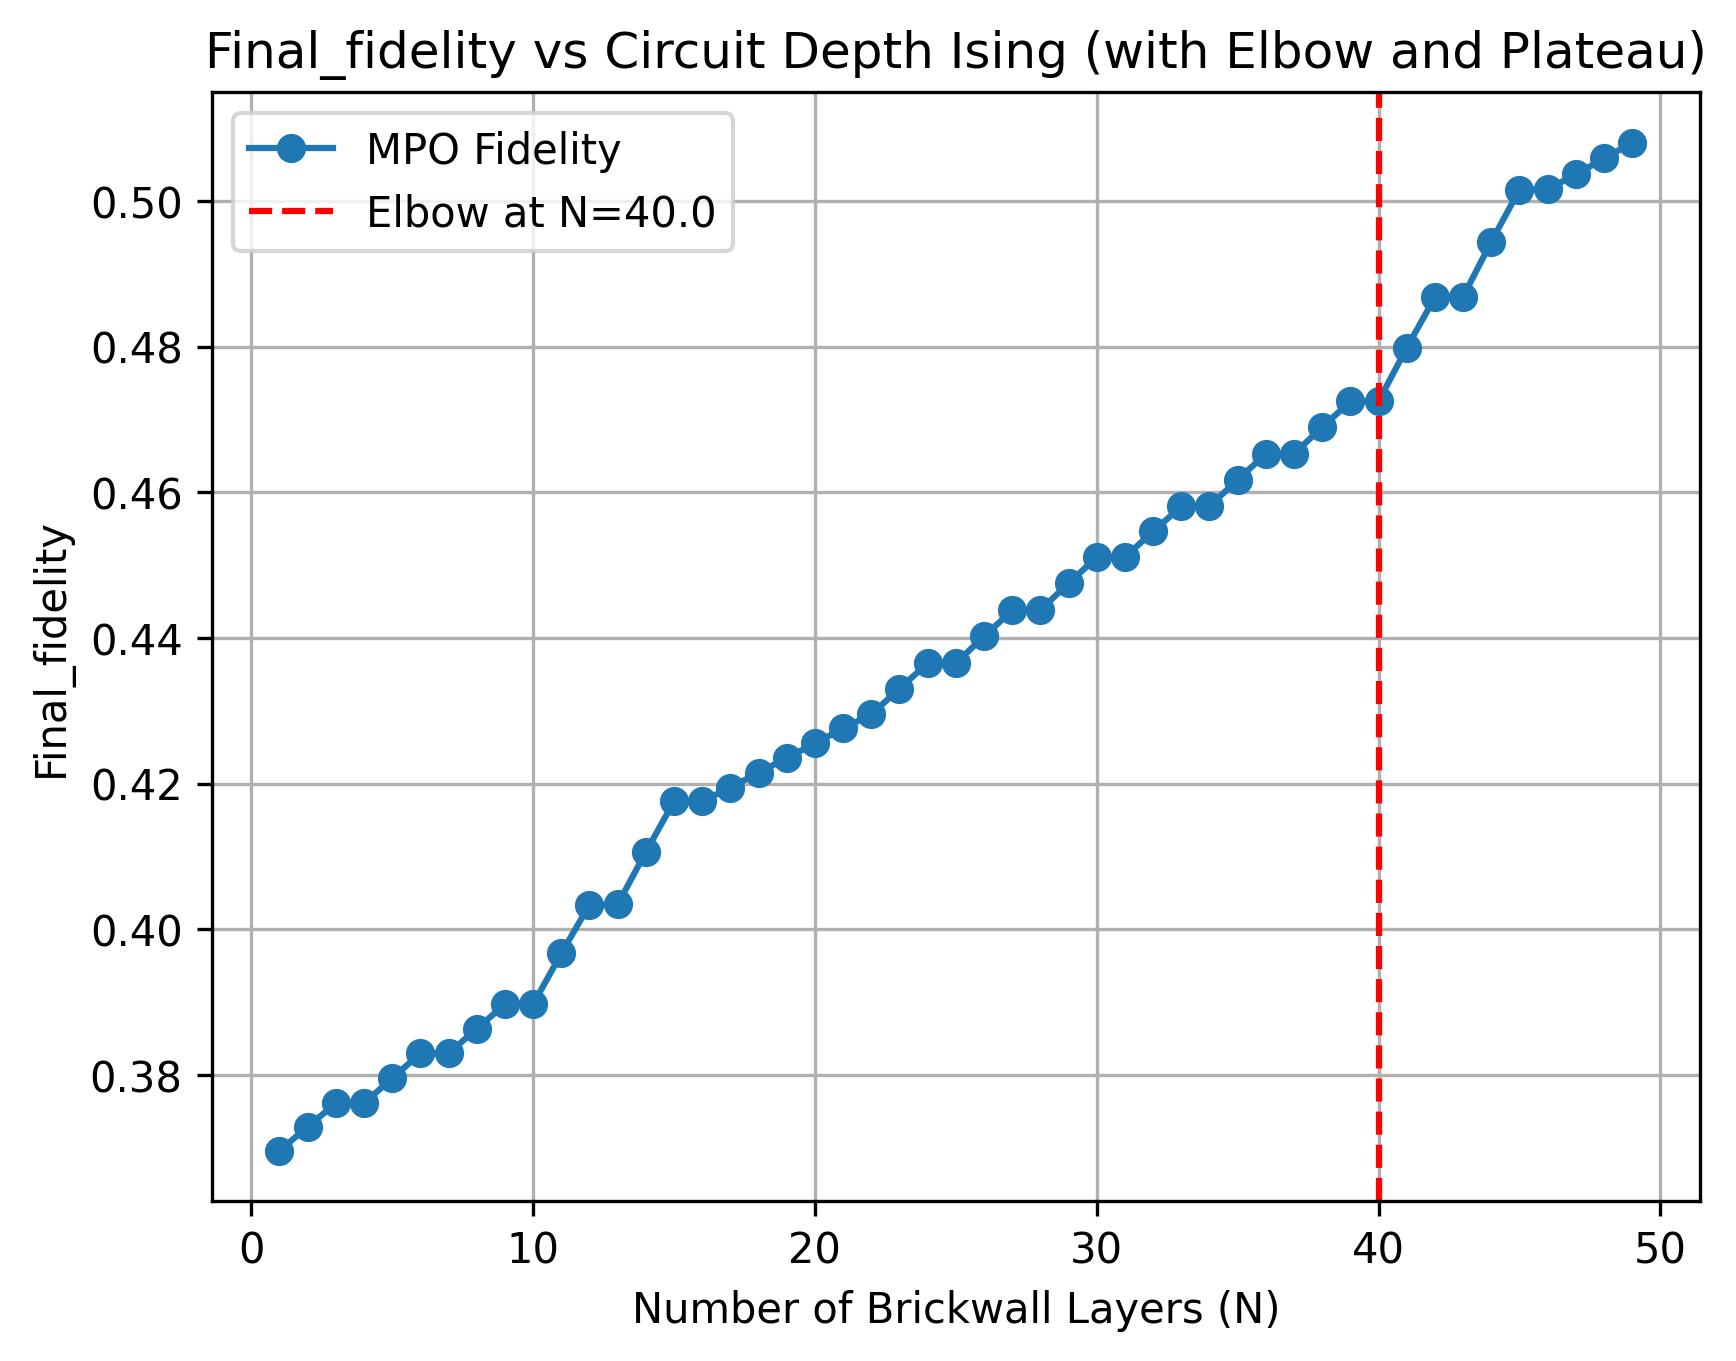


🔍 Suggested optimal compression depth: N = None


In [36]:
from ropt_aqc.brickwall_opt import plot_fidelity

elbow_N_h, plateau_N_h = plot_fidelity(df_h, 'Final_fidelity', evolution_time, 1e-3, method, system, save_path=True)
